In [1]:
!pip list

Package                 Version              Editable project location
----------------------- -------------------- ---------------------------------------------------------------------
absl-py                 2.0.0
asttokens               2.4.1
av                      10.0.0
beautifulsoup4          4.12.2
blinker                 1.6.2
boto3                   1.28.31
botocore                1.31.31
bs4                     0.0.1
cachetools              5.3.2
certifi                 2023.5.7
charset-normalizer      3.2.0
click                   8.1.7
colorama                0.4.6
coloredlogs             15.0.1
comm                    0.2.2
contourpy               1.1.0
cycler                  0.11.0
Cython                  3.0.0
cython-bbox             0.1.3                d:\chycodespace\dataprocessing\mvr_gait\human_trick\cython_bbox-0.1.3
debugpy                 1.8.1
decorator               4.4.2
et-xmlfile              1.1.0
exceptiongroup          1.2.0
executing               2.0.

In [2]:
!pip show ipykernel

Name: ipykernel
Version: 6.29.4
Summary: IPython Kernel for Jupyter
Home-page: 
Author: 
Author-email: IPython Development Team <ipython-dev@scipy.org>
License: BSD 3-Clause License
        
        Copyright (c) 2015, IPython Development Team
        
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        1. Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products 

# decorator

In [4]:
class A:
    # instance method
    def m1(self, n):
        print("self:", self)
    
    # classmethod
    @classmethod
    def m2(cls, n):
        print("cls:", cls)
    
    # staticmethod
    @staticmethod
    def m3(n):
        pass

a = A()
a.m1(1) # ==  A.m1(a, 1)
A.m2(1)
A.m3(1)

self: <__main__.A object at 0x0000020ED316B790>
cls: <class '__main__.A'>


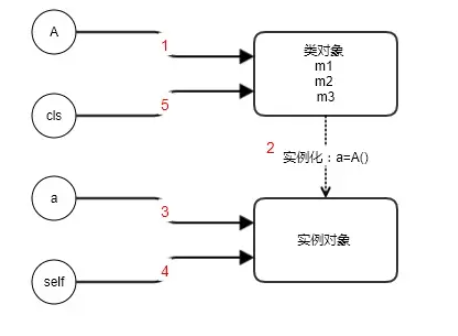

## instance method

In [5]:
print(A.m1)

<function A.m1 at 0x0000020ED1D9F910>


In [6]:
print(a.m1)

<bound method A.m1 of <__main__.A object at 0x0000020ED316B790>>


A.m1是一个还没有绑定实例对象的方法，对于未绑定方法，调用 A.m1 时必须显示地传入一个实例对象进去，而 a.m1是已经绑定了实例的方法，python隐式地把对象传递给了self参数，所以不再手动传递参数，这是调用实例方法的过程。

In [7]:
A.m1(a, 1)  # error A.m1(1)
# ==
a.m1(1)

self: <__main__.A object at 0x0000020ED316B790>
self: <__main__.A object at 0x0000020ED316B790>


## classmethod

In [8]:
print(A.m2)

print(a.m2)

<bound method A.m2 of <class '__main__.A'>>
<bound method A.m2 of <class '__main__.A'>>


m2是类方法，不管是 A.m2 还是 a.m2，都是已经自动绑定了类对象A的方法，对于后者，因为python可以通过实例对象a找到它所属的类是A，找到A之后自动绑定到 cls。

这使得我们可以在实例方法中通过使用 self.m2()这种方式来调用类方法和静态方法。

In [9]:
def m1(self,n):
    print("self:", self)
    self.m2(n)

## staticmethod

In [10]:
print(A.m3)
print(a.m3)

<function A.m3 at 0x0000020ED3254700>
<function A.m3 at 0x0000020ED3254700>


m3是类里面的一个静态方法，跟普通函数没什么区别，与类和实例都没有所谓的绑定关系，它只不过是碰巧存在类中的一个函数而已。不论是通过类还是实例都可以引用该方法。

In [11]:
A.m3(1)
# ==
a.m3(1)

## 静态方法的使用场景

如果在方法中不需要访问任何示例和属性，纯粹地通过传入参数并返回数据的功能性方法，那么就适用静态方法

## 类方法的使用场景

作为工厂方法创建实例对象，例如内置模块 datetime.date 类中就有大量使用类方法作为工厂方法，以此来创建date对象。

如果希望在方法里面调用静态类，那么把方法定义成类方法是合适的，因为要是定义成静态方法，那么你就要显示地引用类A，这对继承来说可不是一件好事情。



In [ ]:
class A:
    
    @staticmethod
    def m1():
        pass
    
    @staticmethod
    def m2():
        A.m1()   # bad
        
    @classmethod
    def m3(cls):
        cls.m1()   # good